In [1]:
import pandas as pd
import numpy as np
import pickle
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [2]:
df = pd.read_csv(r"Dataset\dataset.csv")


In [3]:
df

,v1,v2
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
...,...,...
5922,fraud,to get 1000 INR voucher please call on 8898655...
5923,fraud,to get free access of google cloud account hit...
5924,fraud,to get free AWS cloud account hit on given mes...
5925,fraud,to get free access of Microsoft Azure hit on g...


In [4]:
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)
print(df)
df['label'] = df['label'].map({'normal': 0, 'fraud': 1})
df

       label                                            message
0      fraud  hello, i m bank manager of SBI, ur debit card ...
1      fraud  Todays Vodafone numbers ending with 4882 are s...
2     normal               Please don't say like that. Hi hi hi
3     normal                                         Thank you!
4     normal  Oh that was a forwarded message. I thought you...
...      ...                                                ...
5922   fraud  to get 1000 INR voucher please call on 8898655...
5923   fraud  to get free access of google cloud account hit...
5924   fraud  to get free AWS cloud account hit on given mes...
5925   fraud  to get free access of Microsoft Azure hit on g...
5926   fraud  hello sir, we are from your bank have you fill...

[5927 rows x 2 columns]


,label,message
0,1,"hello, i m bank manager of SBI, ur debit card ..."
1,1,Todays Vodafone numbers ending with 4882 are s...
2,0,Please don't say like that. Hi hi hi
3,0,Thank you!
4,0,Oh that was a forwarded message. I thought you...
...,...,...
5922,1,to get 1000 INR voucher please call on 8898655...
5923,1,to get free access of google cloud account hit...
5924,1,to get free AWS cloud account hit on given mes...
5925,1,to get free access of Microsoft Azure hit on g...


In [5]:
corpus = []
ps = PorterStemmer()

for sms_string in list(df.message):
    # Cleaning special character from the message
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

    # Converting the entire message into lower case
    message = message.lower()

    # Tokenizing the review by words
    words = message.split()

    # Removing the stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming the words
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    message = ' '.join(words)

    # Building a corpus of messages
    corpus.append(message)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
pickle.dump(cv, open('transform.pkl', 'wb'))

X = cv.fit_transform(corpus).toarray()
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

# Creating a pickle file for the CountVectorizer


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [8]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'navmodel.pkl'
pickle.dump(classifier, open(filename, 'wb'))
y_pred=classifier.predict(X_test)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_performance(y_true, y_pred, algorithm_name="Model"):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')  # Use 'weighted' for multiclass
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Print the metrics
    print(f"\nPerformance Evaluation for {algorithm_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:\n", report)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {algorithm_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



Performance Evaluation for Proposed NBC:
Accuracy: 0.98
Precision: 0.87
Recall: 0.92
F1 Score: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1056
           1       0.87      0.92      0.90       130

    accuracy                           0.98      1186
   macro avg       0.93      0.95      0.94      1186
weighted avg       0.98      0.98      0.98      1186



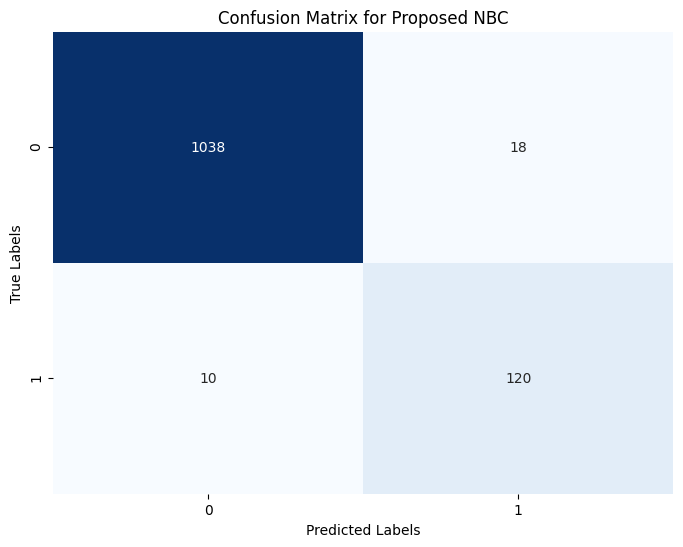

In [10]:
evaluate_performance(y_test, y_pred, "Proposed NBC")

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Fitting K-Nearest Neighbors to the Training set
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors if needed
knn_classifier.fit(X_train, y_train)

# Creating a pickle file for the KNN model
filename = 'knnmodel.pkl'
pickle.dump(knn_classifier, open(filename, 'wb'))

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)


Performance Evaluation for Existing KNN:
Accuracy: 0.94
Precision: 1.00
Recall: 0.45
F1 Score: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1056
           1       1.00      0.45      0.62       130

    accuracy                           0.94      1186
   macro avg       0.97      0.72      0.79      1186
weighted avg       0.94      0.94      0.93      1186



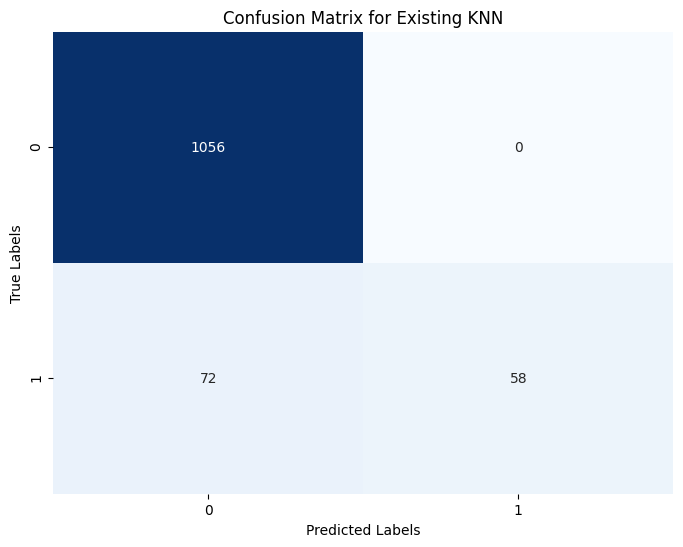

In [12]:
evaluate_performance(y_test, y_pred, "Existing KNN")